<a href="https://colab.research.google.com/github/Fish210/Income-Inequality-Globally-vs.-United-States/blob/main/Income_Inequality_Across_the_Globe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

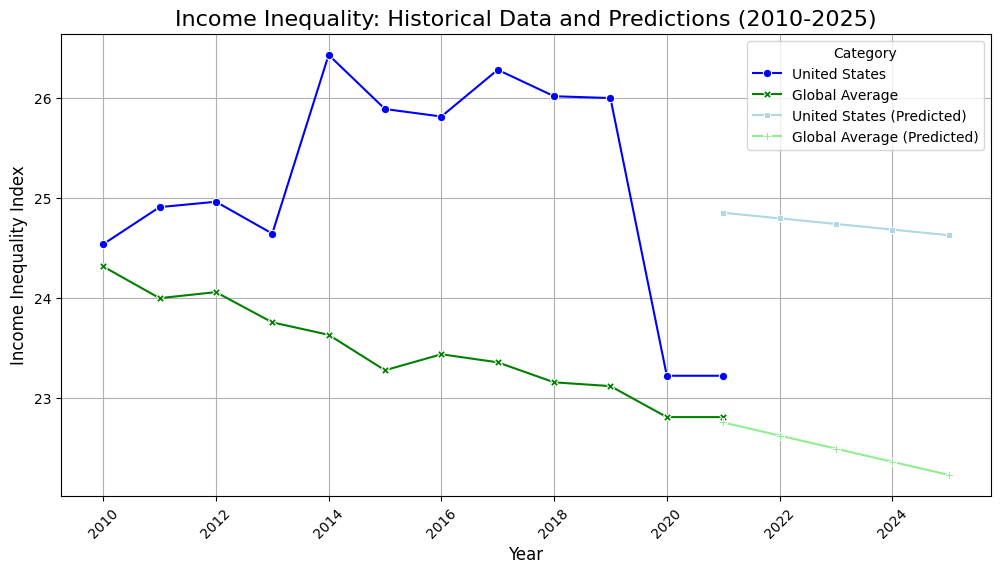

In [55]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

df = pd.read_csv('archive.zip')

# Filter for United States
us_data = df[df['Country'] == 'United States']

columns_to_select = ['Country'] + [col for col in df.columns if 'Inequality in income' in col]
us_inequality = us_data[columns_to_select]

us_inequality_melted = us_inequality.melt(id_vars=['Country'], var_name='Year', value_name='Income Inequality')
us_inequality_melted['Year'] = us_inequality_melted['Year'].str.extract(r'(\d+)').astype(int)

# Calculate the global average for all years
global_avg = df[[col for col in df.columns if 'Inequality in income' in col]].mean()
global_avg_df = pd.DataFrame({'Year': global_avg.index.str.extract(r'(\d+)')[0].astype(int),
                              'Income Inequality': global_avg.values})

# Combine THE actual historical data
us_inequality_melted['Category'] = 'United States'
global_avg_df['Category'] = 'Global Average'
historical_data_df = pd.concat([us_inequality_melted, global_avg_df], ignore_index=True)

# Gather data for prediction
years = us_inequality_melted['Year'].values.reshape(-1, 1)
us_income_inequality = us_inequality_melted['Income Inequality'].values
global_years = global_avg_df['Year'].values.reshape(-1, 1)
global_income_inequality = global_avg_df['Income Inequality'].values

# Take Calculated Averages across the years (on paper) then input onto program
us_model = LinearRegression()
global_model = LinearRegression()
us_model.fit(years, us_income_inequality)
global_model.fit(global_years, global_income_inequality)

future_years = np.array([2021, 2022, 2023, 2024, 2025]).reshape(-1, 1)
us_future_predictions = us_model.predict(future_years)
global_future_predictions = global_model.predict(future_years)

# Create DataFrames for predictions
us_predictions_df = pd.DataFrame({'Year': future_years.flatten(),
                                   'Income Inequality': us_future_predictions,
                                   'Category': 'United States (Predicted)'})
global_predictions_df = pd.DataFrame({'Year': future_years.flatten(),
                                       'Income Inequality': global_future_predictions,
                                       'Category': 'Global Average (Predicted)'})

# Combine historical and predicted data
complete_data_df = pd.concat([historical_data_df, us_predictions_df, global_predictions_df], ignore_index=True)

# Plot historical data and predictions
plt.figure(figsize=(12, 6))
sns.lineplot(data=complete_data_df, x='Year', y='Income Inequality', hue='Category',
             style='Category', markers=True, dashes=False, palette=['blue', 'green', 'lightblue', 'lightgreen'])
plt.title('Income Inequality: Historical Data and Predictions (2010-2025)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Income Inequality Index', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.grid(True)
plt.show()